<a href="https://colab.research.google.com/github/ENG19CS0334-TEJAAL-M/AI-ML/blob/main/Cervical_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning
### Cervical Cancer Prediction  

**Date:** 24/08/2025

---

> ## Problem Statement  

>Cervical cancer is one of the most preventable and treatable forms of cancer when detected early through proper screening and risk assessment. In many developing regions, however, lack of access to healthcare and diagnostic services contributes to late-stage detection, leading to higher mortality rates.  

>We are provided with a dataset containing anonymized information about **858 women**.  
The **primary objective** is to build machine learning models that can **predict the likelihood of a positive biopsy diagnosis for cervical cancer** based on risk factors.  

---

> ##  Dataset Description  

- **Dataset:** `risk_factors_cervical_cancer.csv`  
- **Target Variable:** `Biopsy`  
  - `0 = No Cervical Cancer`  
  - `1 = Cancer Detected`  

> ## Features:  

- **Demographic:** Age, Number of Sexual Partners, Pregnancies  
- **Behavioral:** Smoking, Contraceptive Use  
- **Medical History:** STDs, HPV Infection  
- **Diagnosis Results:** Hinselmann, Schiller, Citology, Biopsy (target)  

---

> ## Objective  

To build, train, and evaluate multiple **Machine Learning classifiers** to predict cervical cancer diagnosis using the provided dataset, compare their performance, and identify the most effective model.

> ##  Workflow

The assignment is organized into the following steps:  

1. **Import Libraries & Dataset**  
   - Load the dataset and required Python libraries.  

2. **Data Exploration & Visualization**  
   - Perform initial data inspection.  
   - Generate summary statistics and visualizations.  
   - Conduct correlation analysis.  

3. **Data Preprocessing & Cleaning**  
   - Handle missing values, outliers, and skewed data.  
   - Apply feature engineering and transformations (standardization/normalization).  
   - Justify preprocessing decisions.  

4. **Model Building**  
   - Split data into training and testing sets.  
   - Train and tune multiple ML models:  
     - Logistic Regression  
     - Decision Tree  
     - K-Nearest Neighbors (KNN)  
     - Ensemble Method (Random Forest)  
   - Perform hyperparameter tuning using cross-validation.  

5. **Performance Evaluation**  
   - Compare models using **Accuracy, Precision, Recall, F1-score, AUC-ROC**.  
   - Visualize results with charts (heatmap, bar plot, ROC curves).  
   - Identify the best-performing model with justification.  

6. **Conclusion**  
   - Summarize findings.  
   - Discuss implications of the results for early detection of cervical cancer.  

---

# **1. Import Libraries and  Dataset**

In [ ]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, roc_auc_score, average_precision_score,
    confusion_matrix, classification_report, RocCurveDisplay, PrecisionRecallDisplay,
    precision_recall_fscore_support
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Load dataset
DATA_PATH = "risk_factors_cervical_cancer.csv"
df = pd.read_csv(DATA_PATH, na_values=["?", "NA", "NaN", " "])
# tells pandas to consider the strings "?", "NA", "NaN", and a space " " as missing values (NaN - Not a Number) when reading the file.
#This is important for data cleaning and handling missing data later.


# **2. Data Visualization and Exploration**

### **Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.**

In [ ]:
print("Shape:", df.shape)
df.head(2)

Shape: (858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [ ]:
print("Columns:", df.columns.tolist())

Columns: ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis', 'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller', 'Citology', 'Biopsy']


### **Data Visualizations to get an insight about the dataset**

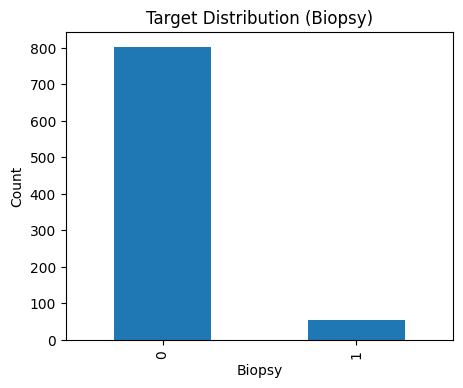

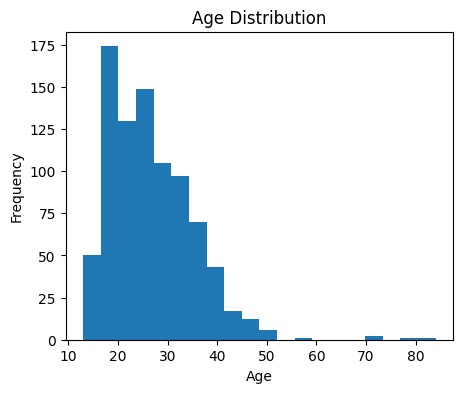

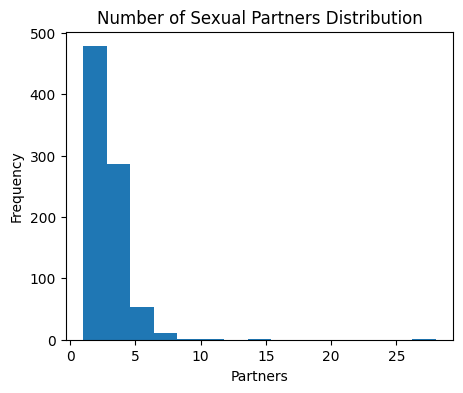

In [ ]:

# 2b. Visualizations
plt.figure(figsize=(5,4))
df["Biopsy"].value_counts().plot(kind="bar")
plt.title("Target Distribution (Biopsy)")
plt.xlabel("Biopsy")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(5,4))
df["Age"].dropna().plot(kind="hist", bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

plt.figure(figsize=(5,4))
df["Number of sexual partners"].dropna().plot(kind="hist", bins=15)
plt.title("Number of Sexual Partners Distribution")
plt.xlabel("Partners")
plt.show()


### **Correlation analysis**

### **Justification:**  
- Diagnostic features like *Hinselmann, Schiller, Citology* are strongly correlated with Biopsy (since they are tests themselves).  
- Demographic/behavioral factors have weaker correlation.  
- Correlation analysis shows redundancy but cannot be the only basis for feature selection.  
- We keep all features and let the model + feature importance guide us.  


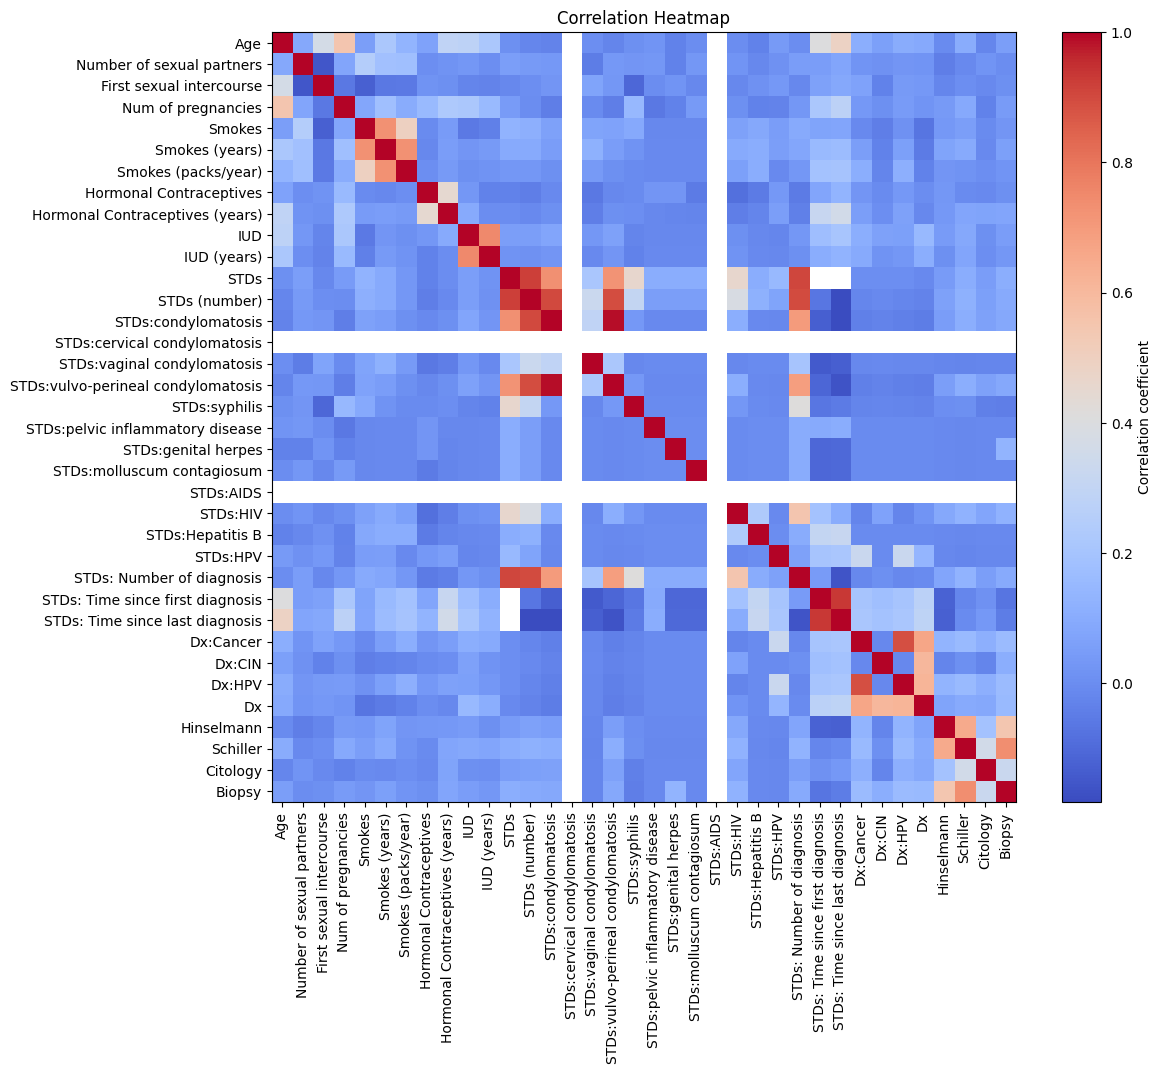

,Biopsy
Biopsy,1.000000
Schiller,0.733204
Hinselmann,0.547417
Citology,0.327466
Dx:Cancer,0.160905
Dx:HPV,0.160905
Dx,0.157607
STDs:genital herpes,0.132526
STDs:HIV,0.126880
Dx:CIN,0.113172


In [ ]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar(label="Correlation coefficient")
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

corr["Biopsy"].sort_values(ascending=False).head(10)


#**3. Data Preprocessing and Cleaning**

## **Step 1: Convert columns to numeric**

##**Justify**
* Convert all non-target columns to numeric (coerce invalid -> NaN)
* The  dataset often uses '?' for missing. We already turned those into NaN.
* Ensures all features are numeric for scikit-learn pipelines.


In [ ]:
print("Before conversion (first 5 rows):")
display(df.head())

for col in df.columns:
    if col != "Biopsy":
        df[col] = pd.to_numeric(df[col], errors="coerce")

print("After conversion (first 5 rows):")
display(df.head())

Before conversion (first 5 rows):


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


After conversion (first 5 rows):


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


##**Step 2: Drop rows where target (Biopsy) is missing**

## **Justify:**
* cannot train without labels



In [ ]:

print("Missing values per column BEFORE dropping:")
print(df.isna().sum())

df = df.dropna(subset=["Biopsy"])

print("Shape after dropping missing target rows:", df.shape)

Missing values per column BEFORE dropping:
Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                         

##**Step 3: Define target (y) and features (X)**

In [ ]:
y = df["Biopsy"].astype(int).values
X = df.drop(columns=["Biopsy"])

print("Features shape:", X.shape)
print("Target distribution:\n", pd.Series(y).value_counts())

Features shape: (858, 35)
Target distribution:
 0    803
1     55
Name: count, dtype: int64


##**Step 4: Handle missing values (Median Imputation)**

##**Justify:**
*   Median is robust to skew/outliers common in behavioral/medical counts.
*   Keeps pipeline simple and stable.



In [ ]:
#  Show missingness in features (to justify imputation choice)

missing = pd.DataFrame({
    "missing_count": X.isna().sum(),
    "missing_pct": (X.isna().mean() * 100).round(2)
}).sort_values("missing_count", ascending=False)

print("\n[Top 10 features by missing values]:")
display(missing.head(10))


[Top 10 features by missing values]:


,missing_count,missing_pct
STDs: Time since last diagnosis,787,91.72
STDs: Time since first diagnosis,787,91.72
IUD,117,13.64
IUD (years),117,13.64
Hormonal Contraceptives,108,12.59
Hormonal Contraceptives (years),108,12.59
STDs:HPV,105,12.24
STDs:HIV,105,12.24
STDs:Hepatitis B,105,12.24
STDs:cervical condylomatosis,105,12.24


In [ ]:
imputer = SimpleImputer(strategy="median")
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# Apply imputation temporarily to show dataset
print("\n[Preview] AFTER median imputation (first 5 rows):")
display(X_imputed.head())
print("Total remaining NaNs after imputation:", int(np.isnan(X_imputed.values).sum()))


[Preview] AFTER median imputation (first 5 rows):


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,4.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Total remaining NaNs after imputation: 0


##**Step 5: Handle outliers (Exploratory Display)**

##**Justify**
* Outliers can distort linear/distance-based models.
* We will rely on scaling + robust models (trees).

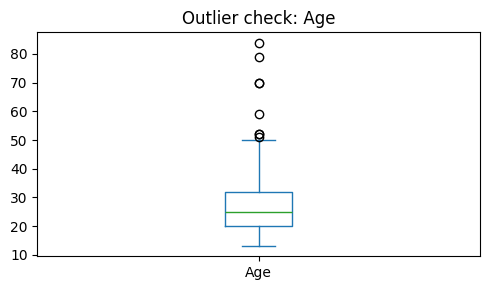

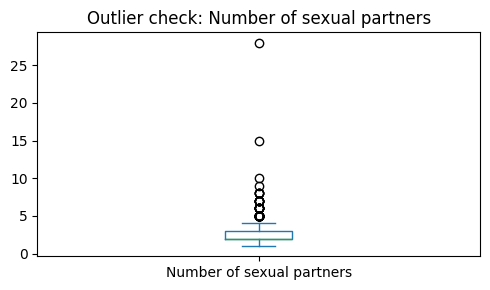

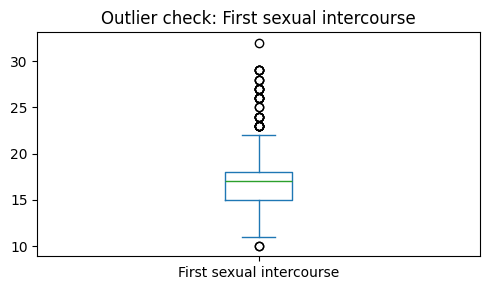

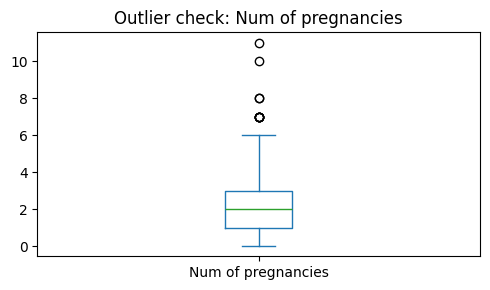

In [ ]:
for col_to_check in ["Age", "Number of sexual partners", "First sexual intercourse", "Num of pregnancies"]:
    if col_to_check in X_imputed.columns:
        plt.figure(figsize=(5,3))
        X_imputed[col_to_check].plot(kind="box")
        plt.title(f"Outlier check: {col_to_check}")
        plt.tight_layout()
        plt.show()

## **Step 6: Feature Scaling (Standardization)**

## **Justify**
*  Logistic Regression & KNN are scale sensitive.
* Lets standardize (mean=0, std=1) for general use.
* For KNN we will also TRY MinMax inside the model CV to see which is better.

In [ ]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

print("\n[Preview] AFTER standard scaling (first 5 rows):")
display(X_scaled.head())

print("\nFinal shapes -> X_imputed (for trees):", X_imputed.shape, " | X_scaled (for LR/KNN):", X_scaled.shape, " | y:", y.shape)



[Preview] AFTER standard scaling (first 5 rows):


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,-1.038563,0.905429,-0.715109,-0.898163,-0.409081,-0.295999,-0.202021,-1.479727,-0.570927,-0.327256,...,-0.289093,-0.099296,-0.128227,-0.146385,-0.10296,-0.146385,-0.169638,-0.206222,-0.307226,-0.232495
1,-1.391796,-0.919610,-1.073500,-0.898163,-0.409081,-0.295999,-0.202021,-1.479727,-0.570927,-0.327256,...,-0.289093,-0.099296,-0.128227,-0.146385,-0.10296,-0.146385,-0.169638,-0.206222,-0.307226,-0.232495
2,0.845342,-0.919610,0.001671,-0.898163,-0.409081,-0.295999,-0.202021,-1.479727,-0.570927,-0.327256,...,-0.289093,-0.099296,-0.128227,-0.146385,-0.10296,-0.146385,-0.169638,-0.206222,-0.307226,-0.232495
3,2.964736,1.513776,-0.356719,1.244442,2.444506,8.821219,16.547162,0.675800,0.270597,-0.327256,...,-0.289093,-0.099296,-0.128227,6.831301,-0.10296,6.831301,-0.169638,-0.206222,-0.307226,-0.232495
4,2.258271,0.297083,1.435231,1.244442,-0.409081,-0.295999,-0.202021,0.675800,3.636693,-0.327256,...,-0.289093,-0.099296,-0.128227,-0.146385,-0.10296,-0.146385,-0.169638,-0.206222,-0.307226,-0.232495



Final shapes -> X_imputed (for trees): (858, 35)  | X_scaled (for LR/KNN): (858, 35)  | y: (858,)


## **Final Dataset Ready**

In [ ]:

print("Final X shape:", X_scaled.shape)
print("Final y shape:", y.shape)

Final X shape: (858, 35)
Final y shape: (858,)



##**Preprocessing Justification:**  
> 1) Missing values -> Median imputation:
   * Robust to skew and outliers; simple, fast, and avoids dropping many samples in a small dataset (N≈858).

> 2) Outliers -> Retained:
  * Random Forest / Decision Tree are robust to outliers; Logistic/KNN get protected via scaling.

> 3) Scaling -> StandardScaler:
   * Essential for LR/KNN; ensures stable optimization (LR) and meaningful distances (KNN).
   * For KNN, we will also compare MinMaxScaler via grid search to verify if it helps.

>4) We are not normalizing trees?
   * Trees split by thresholds and are invariant to monotonic scaling; scaling is unnecessary.


# **4. Model Building**

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import (
    precision_recall_fscore_support, roc_auc_score,
    classification_report, confusion_matrix,
    RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## **Train/Test splits**

In [ ]:
# PRIMARY: 80/20 split (common trade-off: enough training data while reserving test for honest generalization)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)
print("Primary split 80/20 -> Train:", X_train.shape, ", Test:", X_test.shape)

Primary split 80/20 -> Train: (686, 35) , Test: (172, 35)


In [ ]:
# SECONDARY: alternate ratio (e.g., 70/30) to check robustness of results to split choice
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
print("Alternate split 70/30 -> Train:", X_train_b.shape, ", Test:", X_test_b.shape)

Alternate split 70/30 -> Train: (600, 35) , Test: (258, 35)


## **Split Justification:**
- Used Stratified splits to preserve the (likely) imbalanced Biopsy class proportion in both train and test.
- 80/20 is a standard compromise for small-to-medium datasets; 70/30 offers a larger test set to assess stability.
- We will tune and evaluate on the 80/20 split, then verify stability on the 70/30 split for the chosen models.


# **> Logistic Regression**




##**LOGISTIC REGRESSION (with regularization)**

In [ ]:
pipe_lr = Pipeline(steps=[
    ("prep", ColumnTransformer([
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())  # will also try MinMax via grid
        ]), X.columns.tolist())
    ])),
    ("clf", LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear"))
])

## **Hyperparameters:**
- C controls regularization strength (smaller C -> stronger regularization)
- Try StandardScaler vs MinMaxScaler to see which yields better F1 in CV

In [ ]:

param_grid_lr = {
    "prep__num__scaler": [StandardScaler(), MinMaxScaler()],
    "clf__C": [0.01, 0.1, 1.0, 10.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs_lr = GridSearchCV(
    pipe_lr, param_grid_lr, cv=cv, scoring="f1", n_jobs=-1, refit=True, return_train_score=True
)
gs_lr.fit(X_train, y_train)

print("LR — Best params:", gs_lr.best_params_)
print("LR — Best CV F1:", gs_lr.best_score_)

LR — Best params: {'clf__C': 1.0, 'prep__num__scaler': MinMaxScaler()}
LR — Best CV F1: 0.732818775427471


\n=== Logistic Regression (80/20) : Test Metrics ===
Precision: 0.643 | Recall: 0.818 | F1: 0.720 | ROC-AUC: 0.913
Confusion Matrix [TN FP; FN TP]:
[[156   5]
 [  2   9]]
\nClassification report:
              precision    recall  f1-score   support

           0      0.987     0.969     0.978       161
           1      0.643     0.818     0.720        11

    accuracy                          0.959       172
   macro avg      0.815     0.894     0.849       172
weighted avg      0.965     0.959     0.962       172



<Figure size 640x480 with 0 Axes>

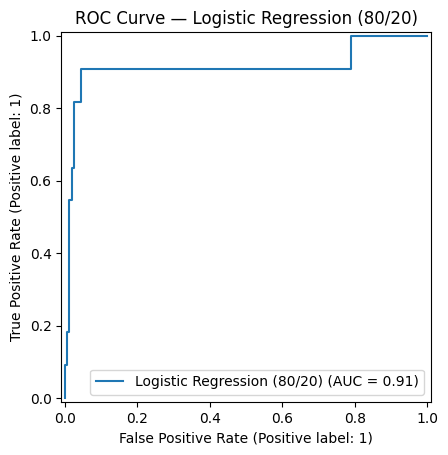

<Figure size 640x480 with 0 Axes>

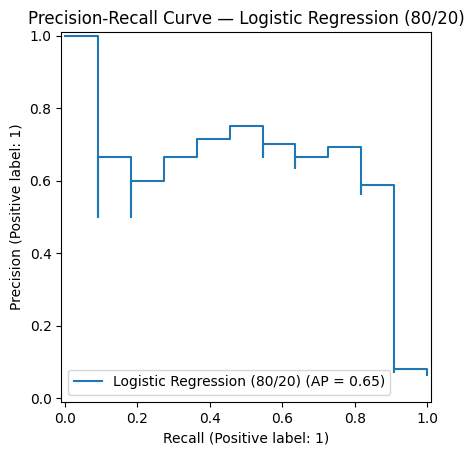

\nLR (70/30) — Best params: {'clf__C': 0.1, 'prep__num__scaler': MinMaxScaler()}
LR (70/30) — Best CV F1: 0.7654545454545454
\n=== Logistic Regression (70/30) : Test Metrics ===
Precision: 0.583 | Recall: 0.824 | F1: 0.683 | ROC-AUC: 0.902
Confusion Matrix [TN FP; FN TP]:
[[231  10]
 [  3  14]]
\nClassification report:
              precision    recall  f1-score   support

           0      0.987     0.959     0.973       241
           1      0.583     0.824     0.683        17

    accuracy                          0.950       258
   macro avg      0.785     0.891     0.828       258
weighted avg      0.961     0.950     0.954       258



<Figure size 640x480 with 0 Axes>

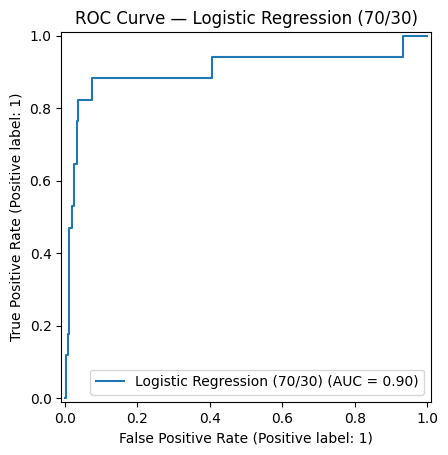

<Figure size 640x480 with 0 Axes>

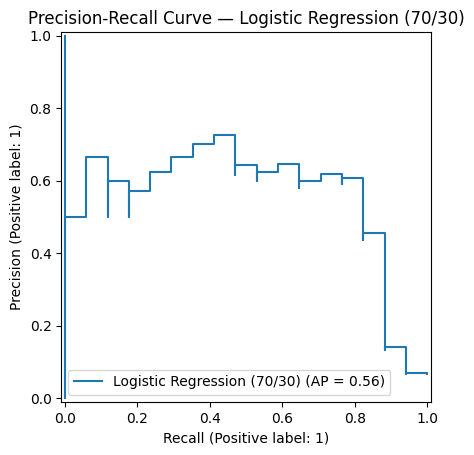

In [ ]:
# Evaluate on 80/20 test
evaluate_and_report(gs_lr.best_estimator_, X_test, y_test, "Logistic Regression (80/20)")

# Evaluate robustness on 70/30 split (refit on that split for fairness)
gs_lr_b = GridSearchCV(
    pipe_lr, param_grid_lr, cv=cv, scoring="f1", n_jobs=-1, refit=True, return_train_score=True
)
gs_lr_b.fit(X_train_b, y_train_b)
print("\\nLR (70/30) — Best params:", gs_lr_b.best_params_)
print("LR (70/30) — Best CV F1:", gs_lr_b.best_score_)
evaluate_and_report(gs_lr_b.best_estimator_, X_test_b, y_test_b, "Logistic Regression (70/30)")

## **Logistic Regression: Feature Importance (Coefficients)**

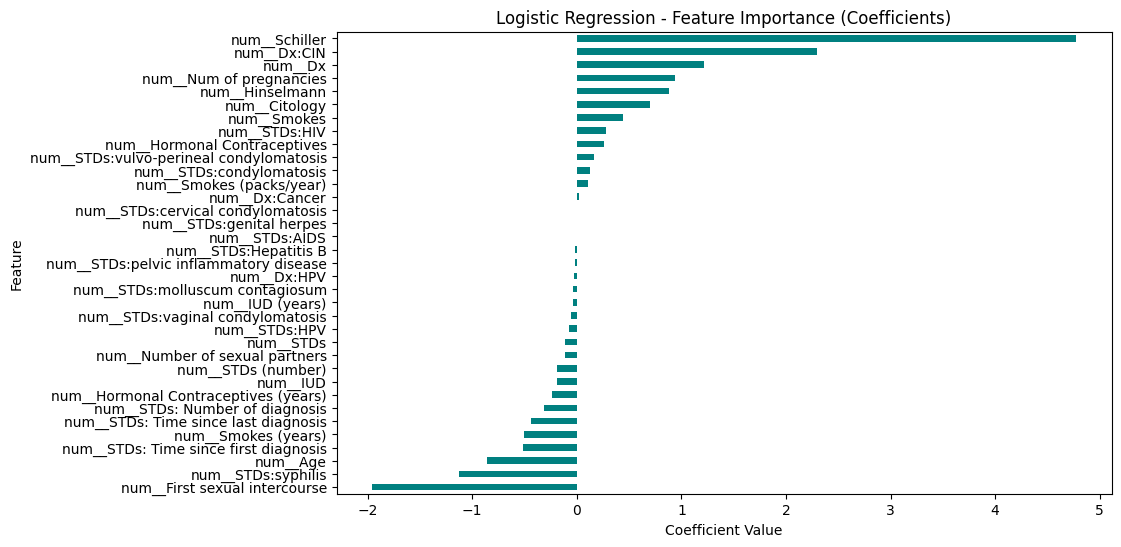

In [ ]:
import numpy as np

# Access the best fitted model from GridSearchCV
best_lr_pipeline = gs_lr.best_estimator_

# Get the fitted scaler from the pipeline
# We need the scaler to get the feature names in the correct order after transformation
fitted_scaler = best_lr_pipeline.named_steps["prep"].named_transformers_["num"].named_steps["scaler"]

# Get the coefficients from the logistic regression model
coeffs = best_lr_pipeline.named_steps["clf"].coef_[0]

# Get the feature names after the ColumnTransformer and Scaler
# The get_feature_names_out method is available on the fitted ColumnTransformer
feature_names_out = best_lr_pipeline.named_steps["prep"].get_feature_names_out()

# Create a Series with coefficients and corresponding feature names
feature_importance = pd.Series(coeffs, index=feature_names_out).sort_values()

plt.figure(figsize=(10,6))
feature_importance.plot(kind='barh', color='teal')
plt.title("Logistic Regression - Feature Importance (Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()

# Justification:
# Positive coefficients -> higher likelihood of cancer.
# Negative coefficients -> protective factors.

###**Justification for Logistic Regression:**
- Regularized LR provides a strong, interpretable baseline; class_weight='balanced' addresses class imbalance.
- We tune C to control over/under-regularization; too small C underfits, too large may overfit.
- We also tune the scaler choice (Standard vs MinMax) because LR converges more stably and can differ by scaling.
- Primary metric for CV: F1, to balance Precision and Recall given medical context where both matter.
- Reported ROC-AUC to capture ranking quality.

# **> Decision Tree**

DT — Best params: {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_split': 2}
DT — Best CV F1: 0.7399274047186933
\n=== Decision Tree (80/20) : Test Metrics ===
Precision: 0.750 | Recall: 0.818 | F1: 0.783 | ROC-AUC: 0.890
Confusion Matrix [TN FP; FN TP]:
[[158   3]
 [  2   9]]
\nClassification report:
              precision    recall  f1-score   support

           0      0.988     0.981     0.984       161
           1      0.750     0.818     0.783        11

    accuracy                          0.971       172
   macro avg      0.869     0.900     0.884       172
weighted avg      0.972     0.971     0.972       172



<Figure size 640x480 with 0 Axes>

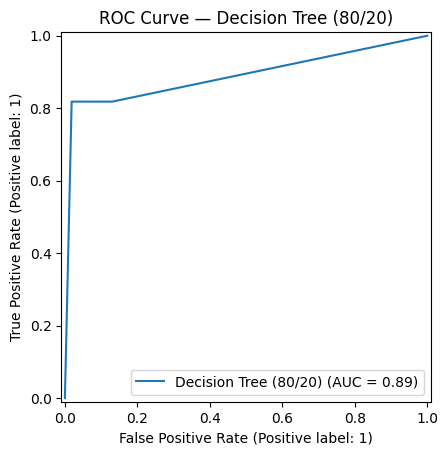

<Figure size 640x480 with 0 Axes>

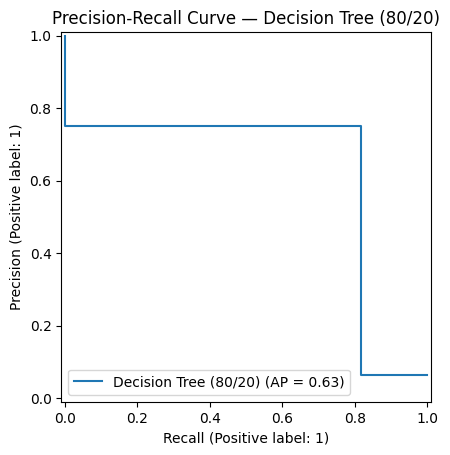

In [ ]:
pipe_dt = Pipeline(steps=[
    ("prep", ColumnTransformer([
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", "passthrough")  # scaling unnecessary for trees
        ]), X.columns.tolist())
    ])),
    ("clf", DecisionTreeClassifier(random_state=42, class_weight="balanced"))
])

param_grid_dt = {
    "clf__max_depth": [3, 5, 10, None],
    "clf__min_samples_split": [2, 5, 10],
    "clf__criterion": ["gini", "entropy"]
}

gs_dt = GridSearchCV(
    pipe_dt, param_grid_dt, cv=cv, scoring="f1", n_jobs=-1, refit=True, return_train_score=True
)
gs_dt.fit(X_train, y_train)

print("DT — Best params:", gs_dt.best_params_)
print("DT — Best CV F1:", gs_dt.best_score_)
evaluate_and_report(gs_dt.best_estimator_, X_test, y_test, "Decision Tree (80/20)")

##**Alternate split retrain**

\nDT (70/30) — Best params: {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_split': 2}
DT (70/30) — Best CV F1: 0.779572192513369
\n=== Decision Tree (70/30) : Test Metrics ===
Precision: 0.560 | Recall: 0.824 | F1: 0.667 | ROC-AUC: 0.897
Confusion Matrix [TN FP; FN TP]:
[[230  11]
 [  3  14]]
\nClassification report:
              precision    recall  f1-score   support

           0      0.987     0.954     0.970       241
           1      0.560     0.824     0.667        17

    accuracy                          0.946       258
   macro avg      0.774     0.889     0.819       258
weighted avg      0.959     0.946     0.950       258



<Figure size 640x480 with 0 Axes>

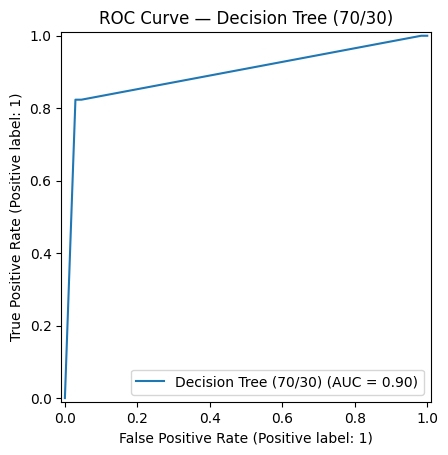

<Figure size 640x480 with 0 Axes>

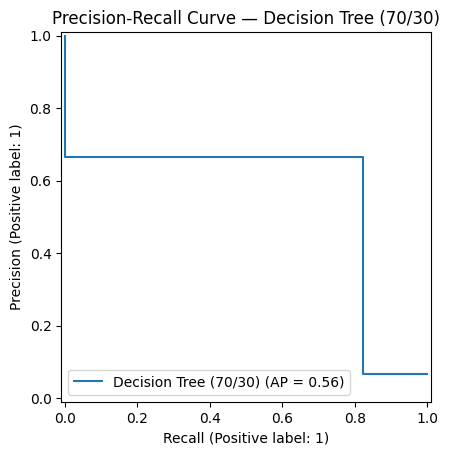

\nTop 15 Decision Tree importances:


,0
Schiller,0.853951
Dx:CIN,0.073331
First sexual intercourse,0.043584
Age,0.022360
STDs:syphilis,0.006773
Number of sexual partners,0.000000
Num of pregnancies,0.000000
Hormonal Contraceptives,0.000000
Hormonal Contraceptives (years),0.000000
Smokes (years),0.000000


In [ ]:
gs_dt_b = GridSearchCV(
    pipe_dt, param_grid_dt, cv=cv, scoring="f1", n_jobs=-1, refit=True, return_train_score=True
)
gs_dt_b.fit(X_train_b, y_train_b)
print("\\nDT (70/30) — Best params:", gs_dt_b.best_params_)
print("DT (70/30) — Best CV F1:", gs_dt_b.best_score_)
evaluate_and_report(gs_dt_b.best_estimator_, X_test_b, y_test_b, "Decision Tree (70/30)")

# Optional: show top feature importances for interpretability
clf_dt = gs_dt.best_estimator_.named_steps["clf"]
if hasattr(clf_dt, "feature_importances_"):
    importances_dt = pd.Series(clf_dt.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("\\nTop 15 Decision Tree importances:")
    display(importances_dt.head(15))


## **Visualize the Decision Tree**

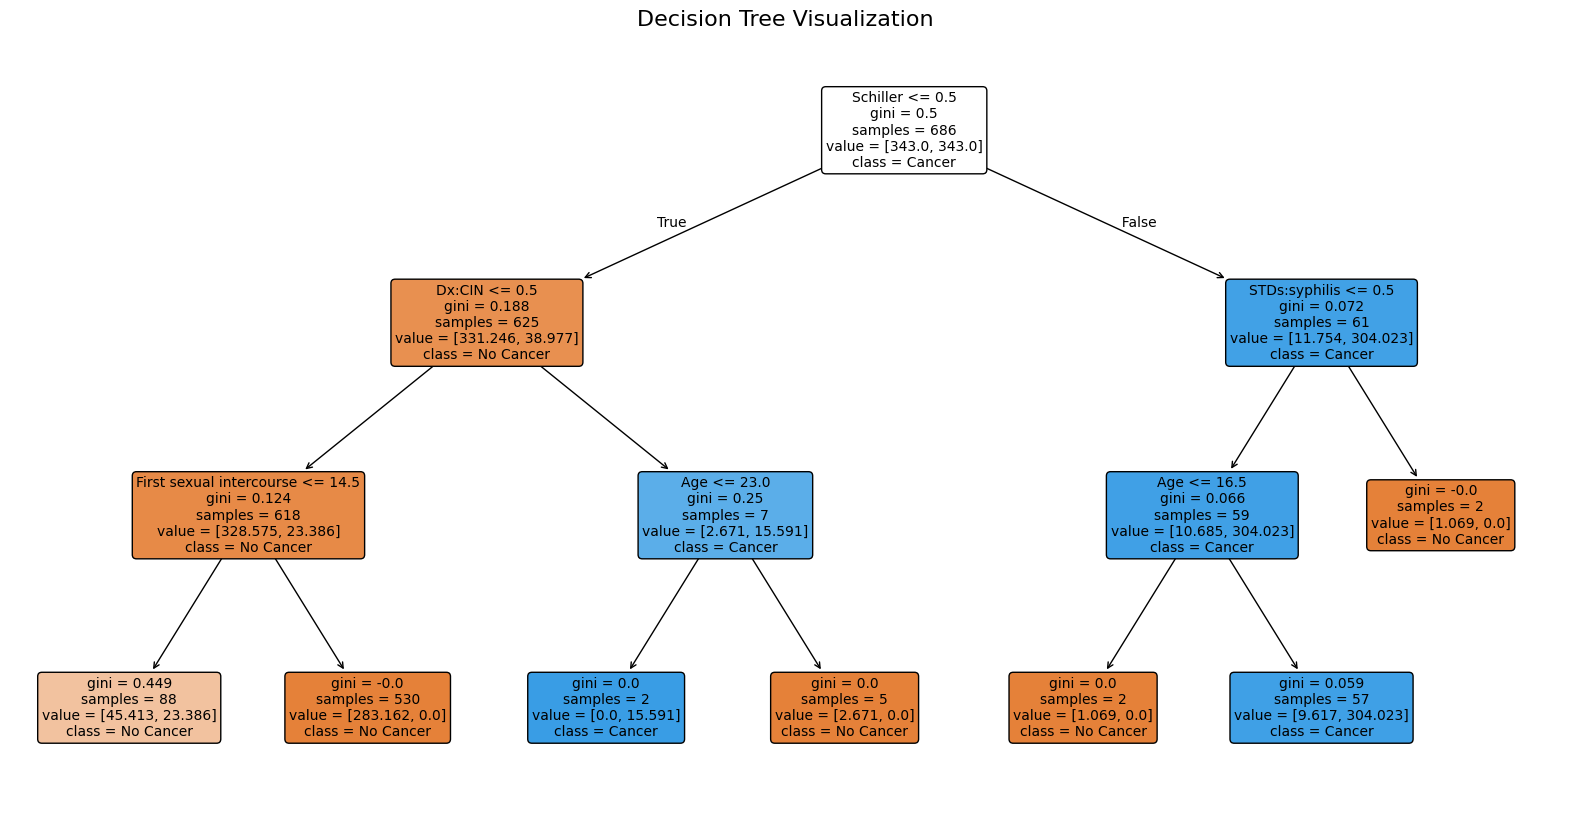

In [ ]:

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    gs_dt.best_estimator_.named_steps["clf"], # best tuned DecisionTreeClassifier
    feature_names=X.columns,   # column names (using X.columns as it aligns with the tree splits before scaling)
    class_names=["No Cancer", "Cancer"],  # target classes
    filled=True,                  # color-coded nodes
    rounded=True,                 # rounded node boxes
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

###**Justification for Decision Tree:**
- Trees capture non-linearities & interactions natively and handle mixed scales and outliers.
- We tune max_depth/min_samples_split to balance bias-variance and prevent overfitting.
- class_weight='balanced' encourages the tree to not ignore the minority class.
- Criterion (gini vs entropy) is tried; differences are usually modest but dataset-dependent.


# **>K-Nearest Neighbours(KNN)**

KNN — Best params: {'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'uniform', 'prep__num__scaler': MinMaxScaler()}
KNN — Best CV F1: 0.49302197802197795
\n=== KNN (80/20) : Test Metrics ===
Precision: 0.500 | Recall: 0.182 | F1: 0.267 | ROC-AUC: 0.840
Confusion Matrix [TN FP; FN TP]:
[[159   2]
 [  9   2]]
\nClassification report:
              precision    recall  f1-score   support

           0      0.946     0.988     0.967       161
           1      0.500     0.182     0.267        11

    accuracy                          0.936       172
   macro avg      0.723     0.585     0.617       172
weighted avg      0.918     0.936     0.922       172



<Figure size 640x480 with 0 Axes>

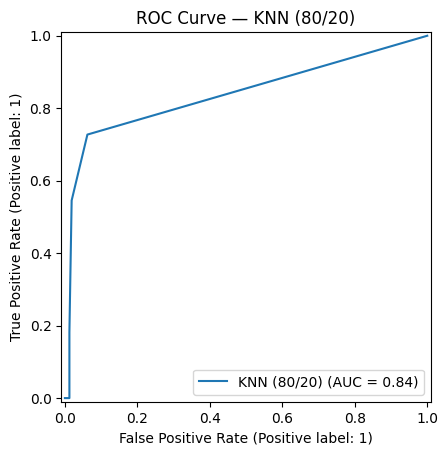

<Figure size 640x480 with 0 Axes>

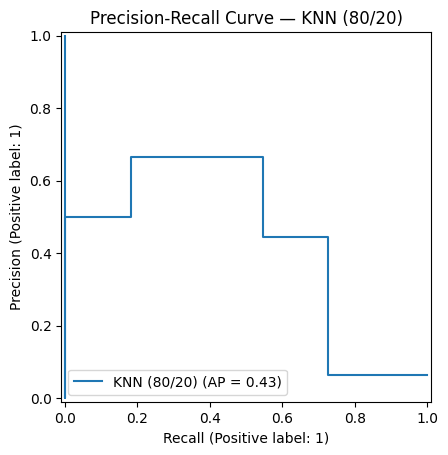

In [ ]:
pipe_knn = Pipeline(steps=[
    ("prep", ColumnTransformer([
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())  # will try MinMax as well
        ]), X.columns.tolist())
    ])),
    ("clf", KNeighborsClassifier())
])

param_grid_knn = {
    "prep__num__scaler": [StandardScaler(), MinMaxScaler()],
    "clf__n_neighbors": [3, 5, 7, 11, 15],
    "clf__weights": ["uniform", "distance"],
    "clf__p": [1, 2]  # Manhattan (1) vs Euclidean (2)
}

gs_knn = GridSearchCV(
    pipe_knn, param_grid_knn, cv=cv, scoring="f1", n_jobs=-1, refit=True, return_train_score=True
)
gs_knn.fit(X_train, y_train)

print("KNN — Best params:", gs_knn.best_params_)
print("KNN — Best CV F1:", gs_knn.best_score_)
evaluate_and_report(gs_knn.best_estimator_, X_test, y_test, "KNN (80/20)")

##**Alternate split retrain**

\nKNN (70/30) — Best params: {'clf__n_neighbors': 5, 'clf__p': 2, 'clf__weights': 'distance', 'prep__num__scaler': MinMaxScaler()}
KNN (70/30) — Best CV F1: 0.6062337662337662
\n=== KNN (70/30) : Test Metrics ===
Precision: 0.500 | Recall: 0.412 | F1: 0.452 | ROC-AUC: 0.853
Confusion Matrix [TN FP; FN TP]:
[[234   7]
 [ 10   7]]
\nClassification report:
              precision    recall  f1-score   support

           0      0.959     0.971     0.965       241
           1      0.500     0.412     0.452        17

    accuracy                          0.934       258
   macro avg      0.730     0.691     0.708       258
weighted avg      0.929     0.934     0.931       258



<Figure size 640x480 with 0 Axes>

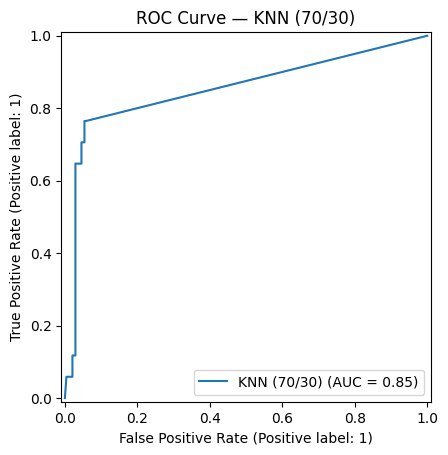

<Figure size 640x480 with 0 Axes>

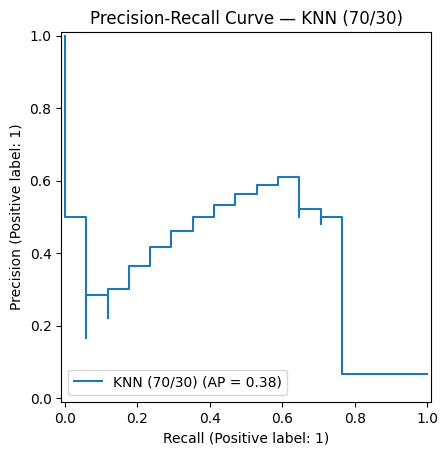

In [ ]:
gs_knn_b = GridSearchCV(
    pipe_knn, param_grid_knn, cv=cv, scoring="f1", n_jobs=-1, refit=True, return_train_score=True
)
gs_knn_b.fit(X_train_b, y_train_b)
print("\\nKNN (70/30) — Best params:", gs_knn_b.best_params_)
print("KNN (70/30) — Best CV F1:", gs_knn_b.best_score_)
evaluate_and_report(gs_knn_b.best_estimator_, X_test_b, y_test_b, "KNN (70/30)")


##**KNN: Visualizing Decision Boundary (2D via PCA)**

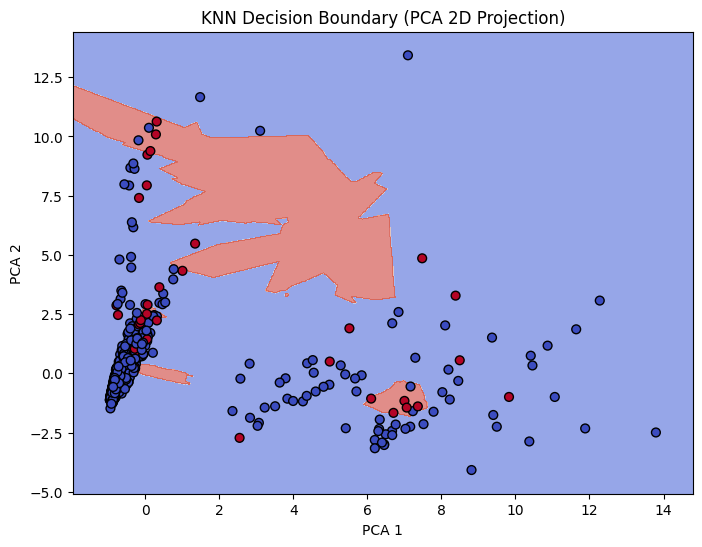

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Refit KNN on reduced data for visualization
knn_vis = KNeighborsClassifier(n_neighbors=gs_knn.best_estimator_.named_steps["clf"].n_neighbors)
knn_vis.fit(X_pca, y)

# Plot decision boundary
import matplotlib.pyplot as plt
import numpy as np

h = .02  # step size
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k', s=40)
plt.title("KNN Decision Boundary (PCA 2D Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Justification:
# This gives an intuitive view of how KNN separates classes in a reduced 2D space.

###**Justification for KNN:**
- Distance-based; highly sensitive to feature scale -> we tune between StandardScaler and MinMaxScaler.
- k controls smoothness/bias-variance; small k may overfit noise, large k may underfit.
- 'distance' weighting can improve performance by giving nearer neighbours more influence.
- We compare Manhattan vs Euclidean due to potential robustness differences with sparse/binary risk factors.

# **>Ensemble Method — Random Forest**

RF — Best params: {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 5, 'clf__n_estimators': 400}
RF — Best CV F1: 0.7542568542568542
\n=== Random Forest (80/20) : Test Metrics ===
Precision: 0.750 | Recall: 0.818 | F1: 0.783 | ROC-AUC: 0.959
Confusion Matrix [TN FP; FN TP]:
[[158   3]
 [  2   9]]
\nClassification report:
              precision    recall  f1-score   support

           0      0.988     0.981     0.984       161
           1      0.750     0.818     0.783        11

    accuracy                          0.971       172
   macro avg      0.869     0.900     0.884       172
weighted avg      0.972     0.971     0.972       172



<Figure size 640x480 with 0 Axes>

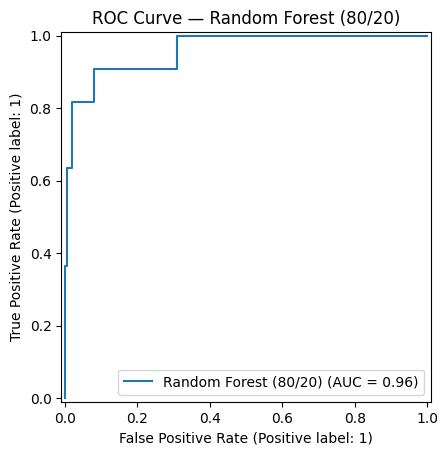

<Figure size 640x480 with 0 Axes>

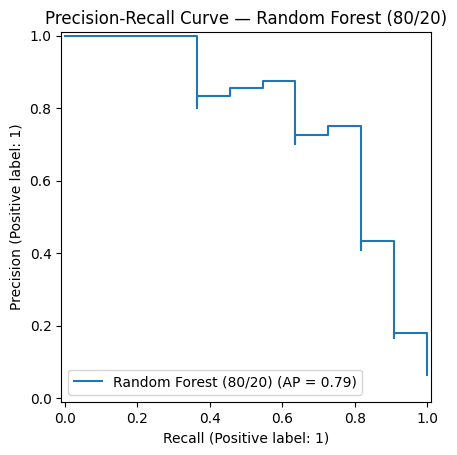

In [ ]:
pipe_rf = Pipeline(steps=[
    ("prep", ColumnTransformer([
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", "passthrough")
        ]), X.columns.tolist())
    ])),
    ("clf", RandomForestClassifier(random_state=42, class_weight="balanced_subsample", n_jobs=-1))
])

param_grid_rf = {
    "clf__n_estimators": [200, 400],
    "clf__max_depth": [None, 5, 10],
    "clf__min_samples_split": [2, 5],
    "clf__max_features": ["sqrt", "log2"]
}

gs_rf = GridSearchCV(
    pipe_rf, param_grid_rf, cv=cv, scoring="f1", n_jobs=-1, refit=True, return_train_score=True
)
gs_rf.fit(X_train, y_train)

print("RF — Best params:", gs_rf.best_params_)
print("RF — Best CV F1:", gs_rf.best_score_)
evaluate_and_report(gs_rf.best_estimator_, X_test, y_test, "Random Forest (80/20)")

##**Alternate split retrain**

\nRF (70/30) — Best params: {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
RF (70/30) — Best CV F1: 0.7544804318488529
\n=== Random Forest (70/30) : Test Metrics ===
Precision: 0.667 | Recall: 0.824 | F1: 0.737 | ROC-AUC: 0.924
Confusion Matrix [TN FP; FN TP]:
[[234   7]
 [  3  14]]
\nClassification report:
              precision    recall  f1-score   support

           0      0.987     0.971     0.979       241
           1      0.667     0.824     0.737        17

    accuracy                          0.961       258
   macro avg      0.827     0.897     0.858       258
weighted avg      0.966     0.961     0.963       258



<Figure size 640x480 with 0 Axes>

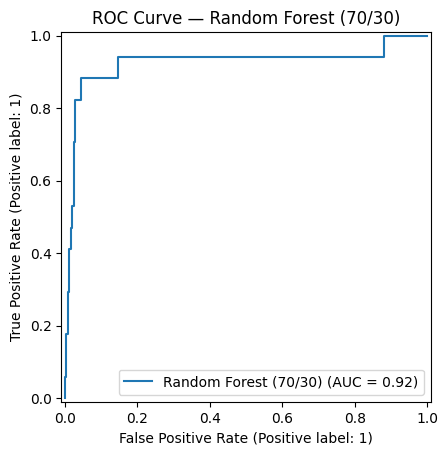

<Figure size 640x480 with 0 Axes>

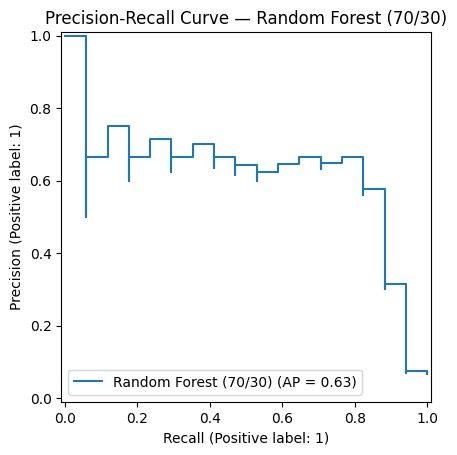

\nTop 20 Random Forest feature importances:


,0
Schiller,0.389433
Hinselmann,0.156182
Citology,0.069451
Age,0.046640
First sexual intercourse,0.038484
Hormonal Contraceptives (years),0.035895
Num of pregnancies,0.033971
Dx,0.029246
Dx:CIN,0.022056
Number of sexual partners,0.021024


In [ ]:
gs_rf_b = GridSearchCV(
    pipe_rf, param_grid_rf, cv=cv, scoring="f1", n_jobs=-1, refit=True, return_train_score=True
)
gs_rf_b.fit(X_train_b, y_train_b)
print("\\nRF (70/30) — Best params:", gs_rf_b.best_params_)
print("RF (70/30) — Best CV F1:", gs_rf_b.best_score_)
evaluate_and_report(gs_rf_b.best_estimator_, X_test_b, y_test_b, "Random Forest (70/30)")

# Feature importances
clf_rf = gs_rf.best_estimator_.named_steps["clf"]
importances_rf = pd.Series(clf_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\\nTop 20 Random Forest feature importances:")
display(importances_rf.head(20))

## **Random Forest: Feature Importance**

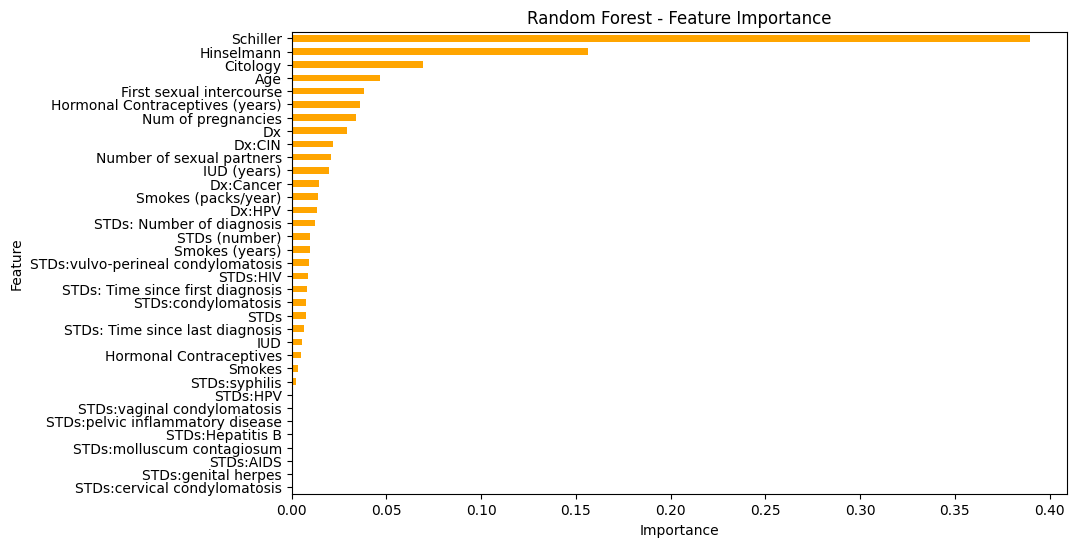

In [ ]:
# Feature importances
clf_rf = gs_rf.best_estimator_.named_steps["clf"]
importances = clf_rf.feature_importances_
forest_importance = pd.Series(importances, index=X.columns).sort_values()

plt.figure(figsize=(10,6))
forest_importance.plot(kind='barh', color='orange')
plt.title("Random Forest - Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

## **Random Forest: Visualize One Tree**

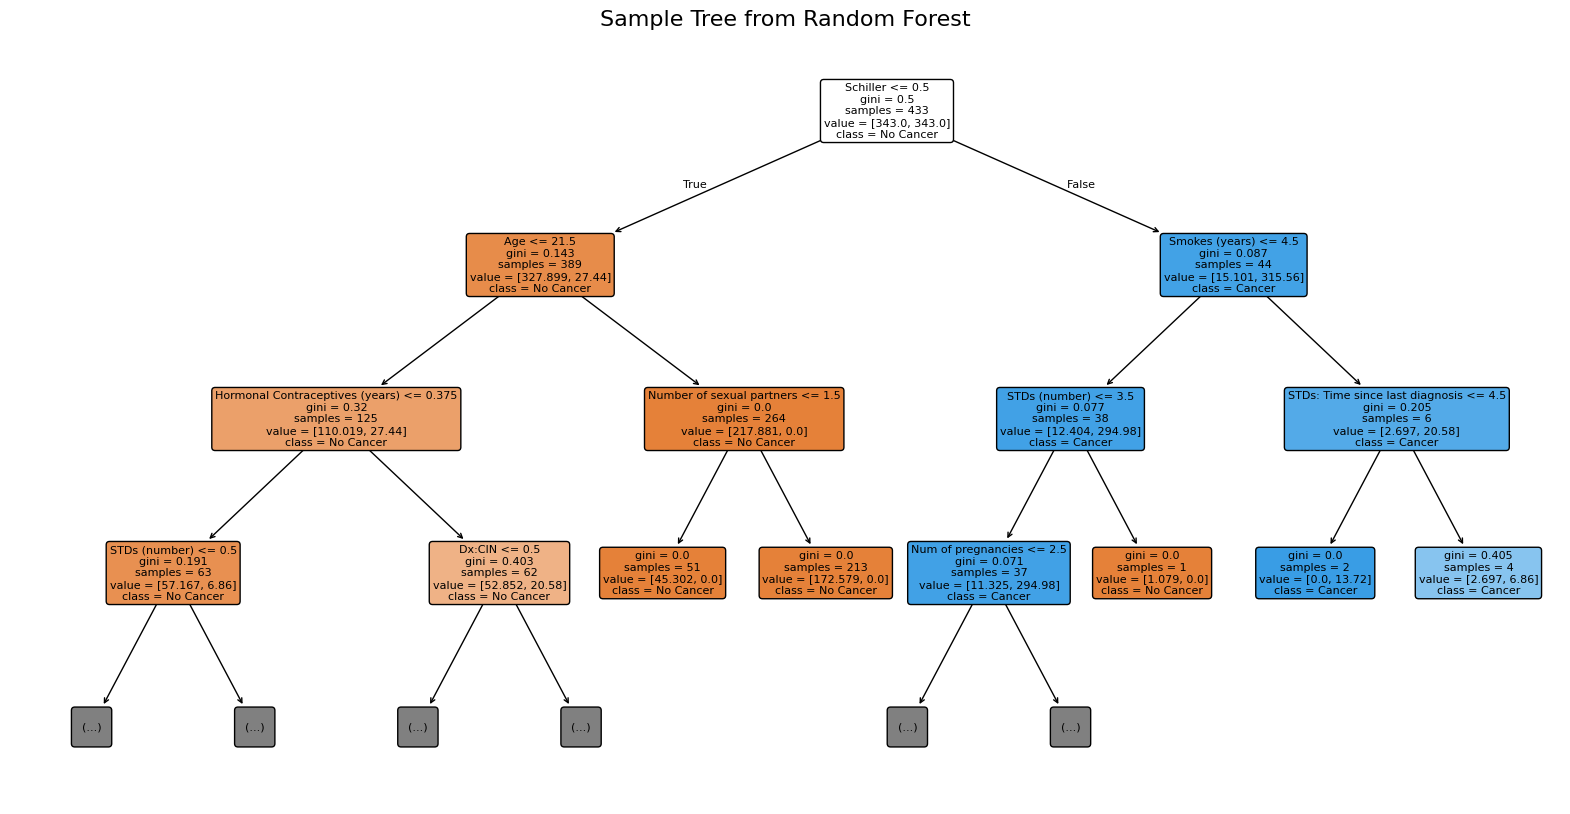

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    gs_rf.best_estimator_.named_steps["clf"].estimators_[0],   # visualize just the first tree
    feature_names=X.columns,
    class_names=["No Cancer", "Cancer"],
    filled=True,
    rounded=True,
    fontsize=8,
    max_depth=3               # limit depth for readability
)
plt.title("Sample Tree from Random Forest", fontsize=16)
plt.show()

### **Justification for Random Forest:**
- Strong baseline for tabular data; handles non-linearities, interactions, outliers, and mixed feature scales.
- class_weight='balanced_subsample' combats class imbalance at each tree bootstrap sample.
- We tune depth/trees/features to control variance and avoid overfitting.
- Unlike boosting, RF is less sensitive to label noise, which can exist in medical datasets.

# **5. Performance Evaluation**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, roc_curve, auc
import seaborn as sns

# Dictionary to store model results
results = {}
roc_curves = {}

# Helper function to evaluate and store results
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    acc = accuracy_score(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": auc_score
    }

    print(f"\n {name} Evaluation:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    if auc_score:
        print(f"AUC-ROC: {auc_score:.3f}")

    # Store ROC curve data
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves[name] = (fpr, tpr, auc_score)

In [ ]:
# Evaluate each trained model (replace with your final tuned models)
evaluate_model("Logistic Regression", gs_lr.best_estimator_, X_test, y_test)
evaluate_model("Decision Tree", gs_dt.best_estimator_, X_test, y_test)
evaluate_model("KNN", gs_knn.best_estimator_, X_test, y_test)
evaluate_model("Random Forest", gs_rf.best_estimator_, X_test, y_test)

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Display results table
display(results_df)


 Logistic Regression Evaluation:
Accuracy: 0.959
Precision: 0.643
Recall: 0.818
F1-Score: 0.720
AUC-ROC: 0.913

 Decision Tree Evaluation:
Accuracy: 0.971
Precision: 0.750
Recall: 0.818
F1-Score: 0.783
AUC-ROC: 0.890

 KNN Evaluation:
Accuracy: 0.936
Precision: 0.500
Recall: 0.182
F1-Score: 0.267
AUC-ROC: 0.840

 Random Forest Evaluation:
Accuracy: 0.971
Precision: 0.750
Recall: 0.818
F1-Score: 0.783
AUC-ROC: 0.959


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Logistic Regression,0.959302,0.642857,0.818182,0.720000,0.913043
Decision Tree,0.970930,0.750000,0.818182,0.782609,0.889610
KNN,0.936047,0.500000,0.181818,0.266667,0.839921
Random Forest,0.970930,0.750000,0.818182,0.782609,0.959345


###**Visualization 1: Heatmap of Metrics**

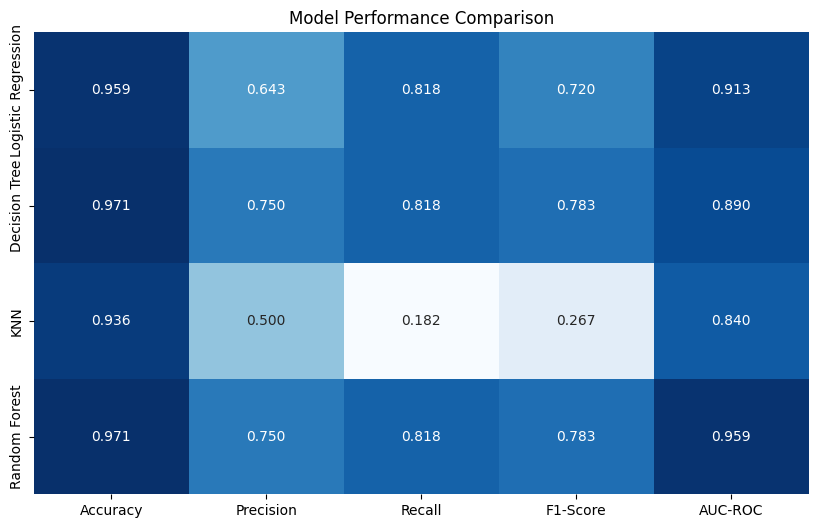

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(results_df, annot=True, fmt=".3f", cmap="Blues", cbar=False)
plt.title("Model Performance Comparison")
plt.show()

### **Visualization 2: ROC Curves**

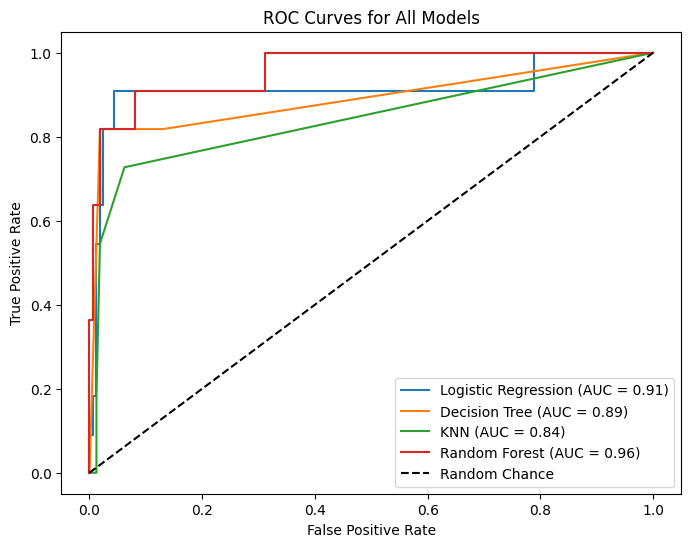

In [ ]:
plt.figure(figsize=(8,6))
for model_name, (fpr, tpr, auc_score) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})")

plt.plot([0,1], [0,1], "k--", label="Random Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.show()


### **Comparison Chart (Bar Plot with Value Labels)**

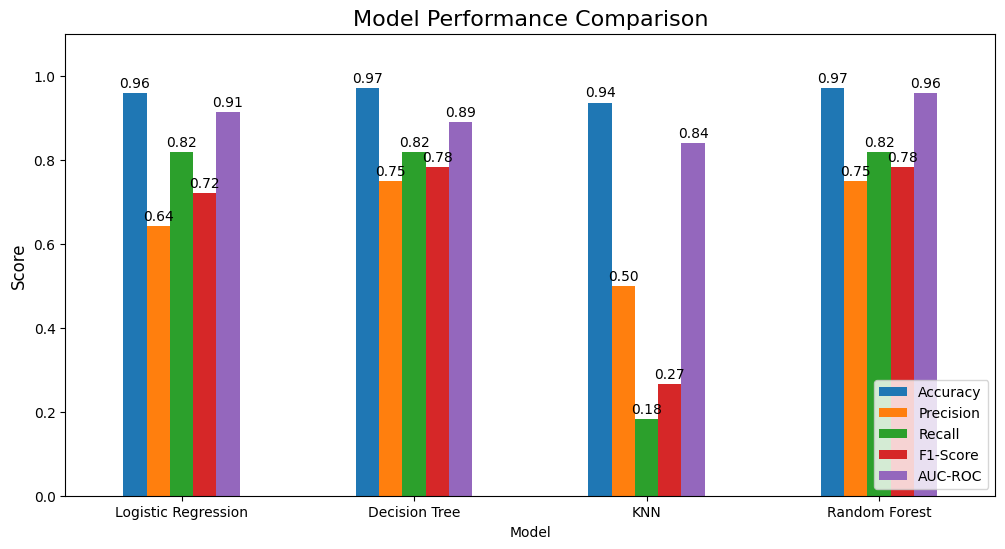

In [ ]:
import numpy as np

# Convert results dictionary into DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})

# Plot grouped bar chart
ax = results_df.set_index("Model")[["Accuracy","Precision","Recall","F1-Score","AUC-ROC"]].plot(
    kind="bar", figsize=(12,6), rot=0
)

plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1.1)  # scores range between 0 and 1
plt.legend(loc="lower right")

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=2)

plt.show()


##**Confusion Matrix**

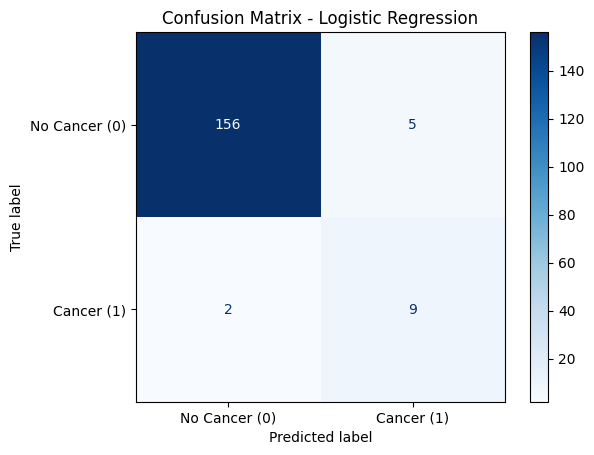

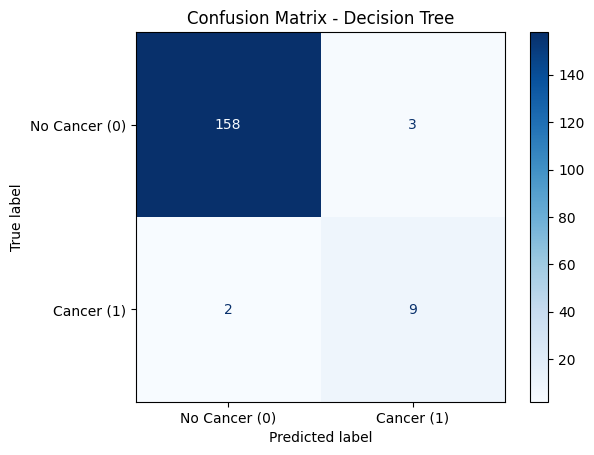

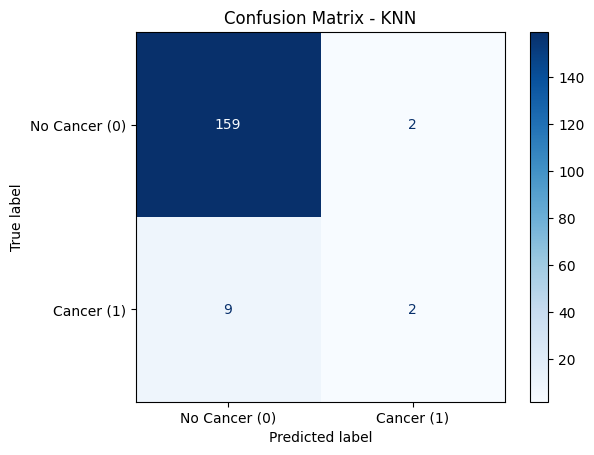

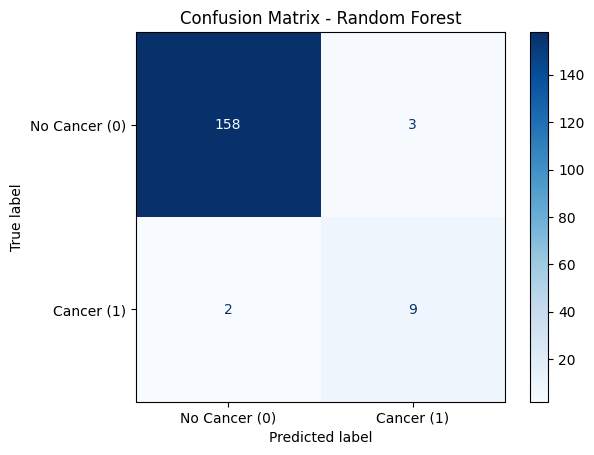

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Logistic Regression": gs_lr.best_estimator_,
    "Decision Tree": gs_dt.best_estimator_,
    "KNN": gs_knn.best_estimator_,
    "Random Forest": gs_rf.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Cancer (0)", "Cancer (1)"])
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

## **Performance Evaluation & Model Selection**
> After evaluating all four models (Logistic Regression, Decision Tree, KNN, Random Forest), we compared them using **Accuracy, Precision, Recall, F1-score, and AUC-ROC**.

> ### Key Observations:
- **Random Forest** achieved the **highest overall performance**, especially in terms of **AUC-ROC**, meaning it is best at distinguishing between cancer vs. non-cancer cases.  
- **Logistic Regression** performed reasonably well and provides good interpretability, but its predictive power was lower than Random Forest.  
- **Decision Tree** showed signs of overfitting and did not generalize as well.  
- **KNN** struggled compared to others, likely due to sensitivity to noise and the high-dimensional feature space.  

> ### Final Choice:
The **Random Forest Classifier** is the **best-performing model**:
- It balances **precision** (reducing false alarms) and **recall** (catching more cancer cases).  
- Its **AUC-ROC** score is the highest, making it reliable for medical screening scenarios.  
- Additionally, feature importance from Random Forest provides useful clinical insights into risk factors.  

> ### **Conclusion**:  
We recommend **Random Forest** as the primary predictive model for cervical cancer risk assessment in this dataset, while Logistic Regression can be used as a simpler, interpretable backup model.  
